In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist


In [32]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

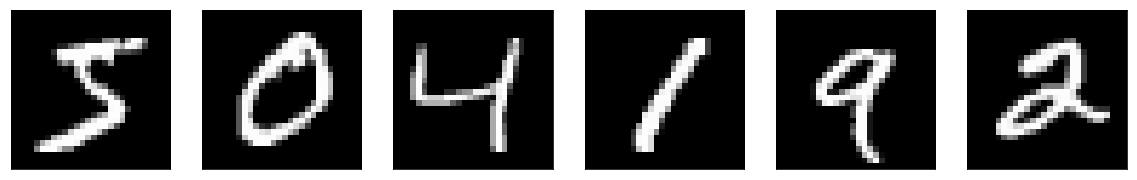

In [46]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    

## Resacle the values

In [43]:
#rescale [0,255] --> [0,1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


## Encode categorical integer labels using one-hot encoding

In [35]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print("one-hot labels:")
# print(y_train[:10])
# how split 


## define model architecture

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## compile the model

In [38]:
model.compile(loss='categorical_crossentropy' , optimizer='rmsprop' , metrics=['accuracy'])

## train the model

In [39]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5' , verbose =1, save_best_only = True)

hist = model.fit(X_train, y_train, batch_size=128, epochs = 10, validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 141us/step - loss: 0.2798 - acc: 0.9152 - val_loss: 0.1393 - val_acc: 0.9577

Epoch 00001: val_loss improved from inf to 0.13933, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 7s 152us/step - loss: 0.1205 - acc: 0.9625 - val_loss: 0.1167 - val_acc: 0.9663

Epoch 00002: val_loss improved from 0.13933 to 0.11666, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 7s 149us/step - loss: 0.0890 - acc: 0.9735 - val_loss: 0.0902 - val_acc: 0.9752

Epoch 00003: val_loss improved from 0.11666 to 0.09021, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 7s 148us/step - loss: 0.0712 - acc: 0.9785 - val_loss: 0.0847 - val_acc: 0.9764

Epoch 00004: val_loss improved from 0.09021 to 0.08472, saving model to mnist.model.best.hdf5
Epoch 5/10
48000/48000

In [41]:
model.load_weights('mnist.model.best.hdf5')

## calculate the classification accuracy on the test set

In [42]:
score = model.evaluate(X_test, y_test, verbose = 0)
accuracy = 100 * score[1]
print("Test accuracy: {:.4f}".format(accuracy))

Test accuracy: 97.8700


conclusion:
MLP gave us very good accuracy on MNIST dataset. Here we had clean images of digits all in same size, with digits always in same position. We should use CNN if we don't have such a clean and organized dataset.    
    